In [8]:
import numpy as np
import lqg1d
import matplotlib.pyplot as plt
import utils

### Experiments parameters

In [9]:
# We will collect N trajectories per iteration
N = 100
# Each trajectory will have at most T time steps
T = 100
# Number of policy parameters updates
n_itr = 100
# Set the discount factor for the problem
discount = 0.9
# Learning rate for the gradient update
learning_rate = 0.0001

### Update Rule

In [10]:
class ConstantStep(object):
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    def update(self, gt):
        return self.learning_rate * gt


class AdamStep(object):
    def __init__(self, beta1=0.9, beta2=0.999, epsilon=10 ** (-8), alpha=0.1):
        self.m = 0
        self.v = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.alpha = alpha

    def update(self, gt, t):
        self.m = self.beta1 * self.m + (1 - self.beta1) * gt
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gt ** 2)
        m_ = self.m / (1 - self.beta1 ** t)
        v_ = self.v / (1 - self.beta2 ** t)
        return self.alpha * m_ / (v_ ** 0.5 + self.epsilon)

In [11]:
class Policy:
    def __init__(self, sigma, theta):
        self.sigma = sigma
        self.theta = theta

    def draw_action(self, s):
        return np.random.normal(self.theta * s, self.sigma)
    

env = lqg1d.LQG1D(initial_state_type='random')
policy = Policy(0.5, 0)
stepper = ConstantStep(learning_rate)
stepperAdam = AdamStep()


mean_parameters = []
avg_return = []
for i in range(n_itr):
    if (i%10 ==0 or i ==n_itr-1):
        print(i)
    paths = utils.collect_episodes(env, policy=policy, horizon=T, n_episodes=N)

    gradJ_MC = 0.
    reward_MC = 0.
    for n in range(N):
        reward = 0.
        gradLogPi = 0.
        for t in range(T):
            a = paths[n]['actions'][t]
            s = paths[n]['states'][t]
            r = paths[n]['rewards'][t]
            gradLogPi = (a-s*policy.theta)*s/(policy.sigma ** 2)
            reward += r * (discount ** t)
        gradJ = reward * gradLogPi
        gradJ_MC += gradJ
        reward_MC += reward

    gradJ_MC = gradJ_MC / N
    reward_MC = reward_MC / N

    policy.theta += stepper.update(gradJ_MC)
    mean_parameters.append(np.asscalar(policy.theta))
    avg_return.append(reward_MC)

0
10
20
30
40
50
60
70
80
90
99


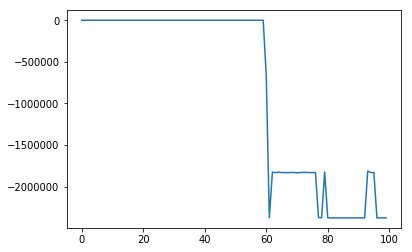

In [12]:
plt.figure()
plt.plot(avg_return)
plt.show()

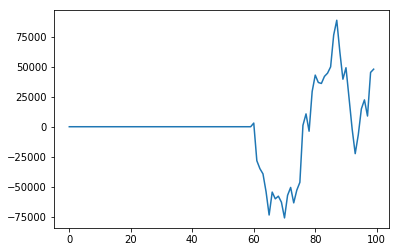

In [13]:
plt.figure()
plt.plot(mean_parameters)
plt.show()

In [14]:
mean_parameters

[-0.010339971997660116,
 -0.00691928685919019,
 -0.021294459955587493,
 -0.024048581214322625,
 -0.0225074929990342,
 -0.013133622786123842,
 -0.049435249203894686,
 -0.04677532493983648,
 -0.04775408650850861,
 -0.05264042212677923,
 -0.05063323065595063,
 -0.05453854334980393,
 -0.05637585865560437,
 -0.05516235118188228,
 -0.05294066276558031,
 -0.048079536369472,
 -0.05303097020544867,
 -0.05659194665087275,
 -0.061444080478895394,
 -0.05662555778911218,
 -0.05872825476816811,
 -0.05751620501700257,
 -0.0550842097715158,
 -0.0537532631683676,
 -0.05613686983494343,
 -0.05379995032275056,
 -0.058742345621358445,
 -0.061233438065576795,
 -0.06152713185136343,
 -0.06067658050731168,
 -0.062375544790971245,
 -0.06384628791774932,
 -0.06226158766383219,
 -0.06349846013988027,
 -0.05795820399302202,
 -0.05687491339399074,
 -0.05743727348994585,
 -0.06233593604900146,
 -0.05928936592870748,
 -0.056808491754882534,
 -0.05584321926013149,
 -0.05242033594024999,
 -0.052055416076628516,
 -0.0